<a href="https://colab.research.google.com/github/Sainikithaharish06/auto-mpg/blob/main/Auto_NN_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
auto=pd.read_csv("auto-mpg.csv1.csv",  
                 names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car names"])

In [ ]:
auto



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car names
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
auto['horsepower'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193,   0, 100, 105, 175,
       153, 180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208,
       155, 112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91,
       122,  67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,
        53,  81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,
        66, 139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,
        74, 116,  82])

In [ ]:
auto.horsepower.mean()

102.89447236180905

In [ ]:
auto['horsepower']=auto['horsepower'].replace(0,auto['horsepower'].mean())

In [ ]:
auto.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car names
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [ ]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car names       0
dtype: int64

In [ ]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.445645,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199671,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


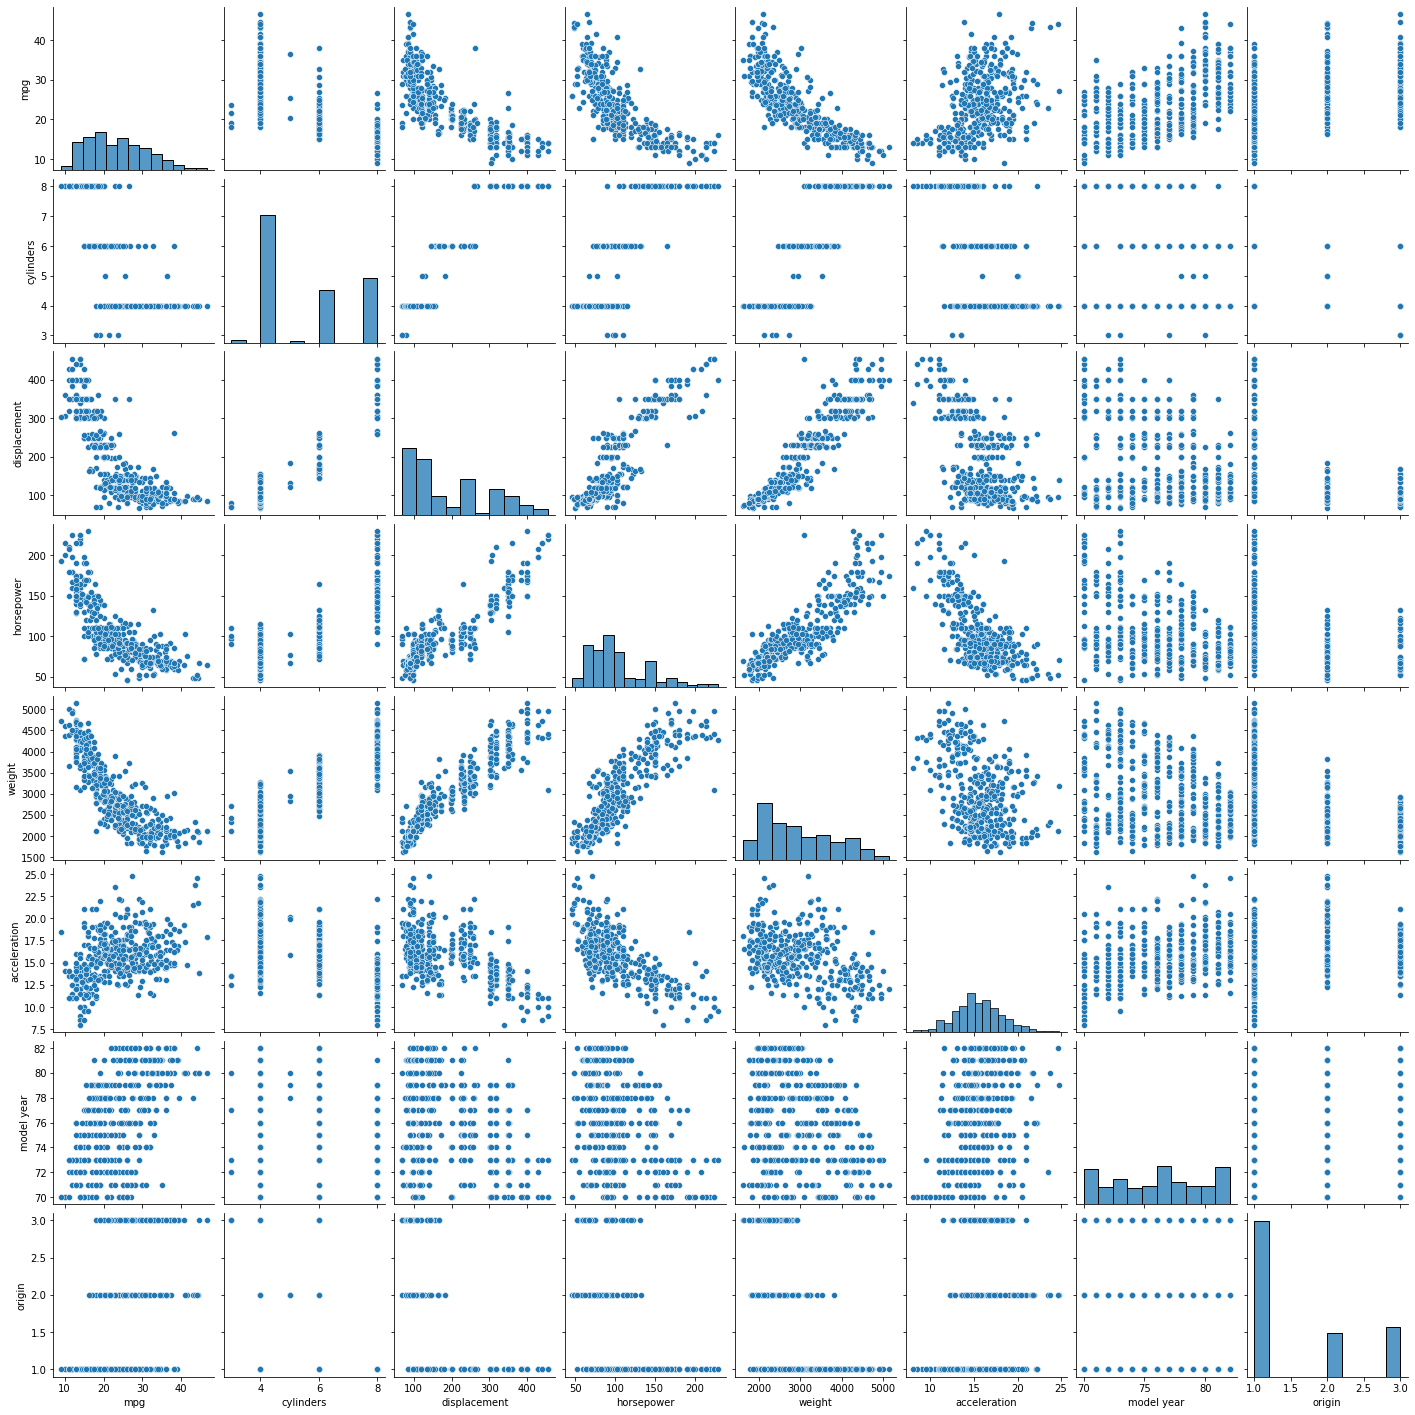

In [ ]:
import seaborn as sns
sns.pairplot(auto)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


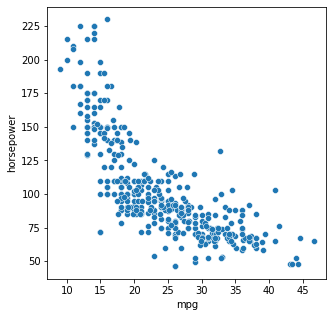

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.scatterplot(auto['mpg'],auto['horsepower'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


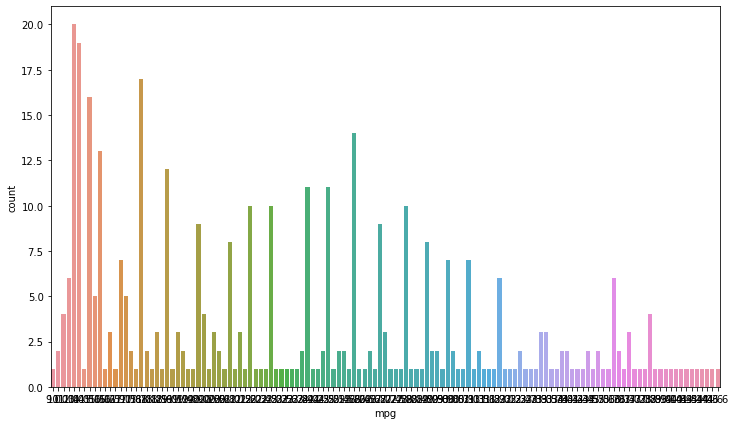

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(auto['mpg'])
plt.show()

In [ ]:
correlation=auto.corr()

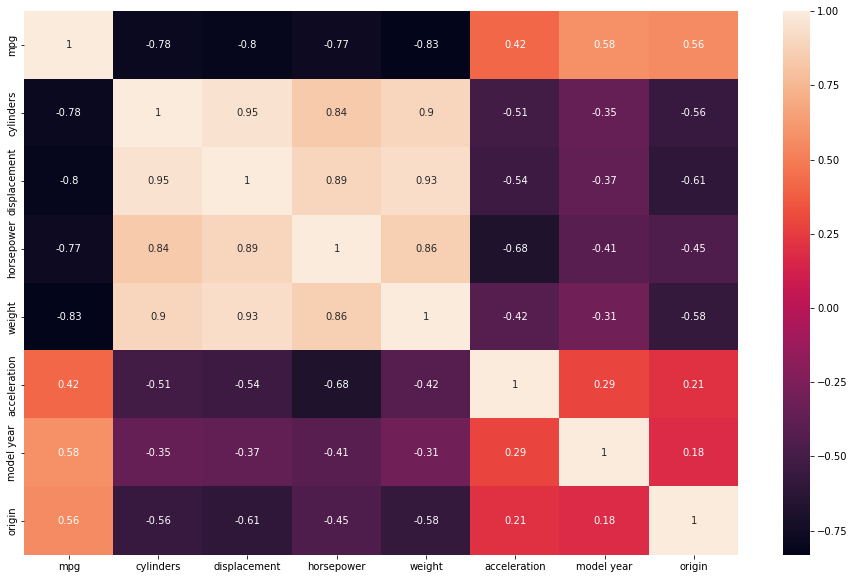

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(correlation, annot=True)
plt.show()

In [ ]:
x=auto.drop(['mpg','car names','origin','model year'],axis=1)
y=auto["mpg"]
x.head()

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130.0,3504,12.0
1,8,350.0,165.0,3693,11.5
2,8,318.0,150.0,3436,11.0
3,8,304.0,150.0,3433,12.0
4,8,302.0,140.0,3449,10.5


In [ ]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [ ]:
from sklearn.model_selection  import train_test_split
x1_train,x1_test,y1_train,y1_test= train_test_split(x,y,test_size=0.20,train_size=80)
x2_train,x2_test,y2_train,y2_test= train_test_split(x,y,test_size=0.25,train_size=85)
x3_train,x3_test,y3_train,y3_test= train_test_split(x,y,test_size=0.30,train_size=70)
x4_train,x4_test,y4_train,y4_test= train_test_split(x,y,test_size=0.35,train_size=65)

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x1_train,y1_train)
lm.fit(x2_train,y2_train)
lm.fit(x3_train,y3_train)
lm.fit(x4_train,y4_train)

LinearRegression()

In [ ]:
y1_pred=lm.predict(x1_test)
y2_pred=lm.predict(x2_test)
y3_pred=lm.predict(x3_test)
y4_pred=lm.predict(x4_test)

In [ ]:
print(y1_pred)

[12.91208172 31.60357526 12.17121453 22.76344952 26.86404564 27.82999206
 27.31949335 23.76020607 12.55781634 25.60893059 27.39879089 17.22198727
 31.63330848 33.37511219 30.10703158 30.25470505 26.96479866 35.09638535
 25.50667108 24.33590936 15.93646317 11.61110737 29.26910859 29.60759084
 30.05546497 27.28659668 16.76052854 31.19167281 33.77383068 20.85791823
 12.78772631 25.59075264 32.51656399 25.34847227 16.00711682 29.69020878
 25.48264304 33.36232512 24.45262845 14.90806887 21.52650638 30.57365044
 30.92086417 26.5850165  31.49208396 23.90950106 31.96563673 22.49939496
 27.21232236 23.31819567 16.87021033 31.44850409 27.15495782 13.6147171
 28.5357502  20.11081591 27.04975968 22.76540685 22.67512865 24.11971503
 14.16047451 30.37997825 13.07888188 28.26606413 27.01314047 22.08582676
 16.40232712 11.86031636 30.00628944 24.37779326 13.68479065 30.85327164
 21.844601   19.00472443 22.02646359 13.87410624 30.87374925 34.8256515
 22.6844809  34.33020999]


In [ ]:
print(y2_pred)

[26.99053005 23.39343541 31.73924222  8.77065264 31.38040279 30.4378875
 30.93525322 31.55080035 23.37613166 12.51641818 25.59075264 27.15495782
 30.87374925 24.68001569 22.6844809  32.15475781 22.63780266 29.80928219
 28.77333413 13.33378871 26.60062366 32.31115745 23.04679678 22.34233126
 27.66036654 13.68479065 13.6147171  19.98521478 30.26354296 15.42251449
 12.87244136 20.96286774 30.56985129 31.38269725 13.07605239 15.92002578
 18.25904639 30.00628944 30.46432129 24.11971503 27.12154278 13.61541912
 16.34765913 22.11662913  8.44052636 28.31123827 23.31819567 18.67133668
 30.10963877 20.85791823 26.86404564 25.34847227 30.05546497 17.02010039
 17.98308395 32.77248663 18.90779945 20.72987961 29.26910859 28.5357502
 12.55781634 32.08602248 13.96122943 30.93309082 32.16265183 16.55424438
 23.90950106 21.34084316 31.18620883 30.10703158 27.52100135 16.00711682
 26.03491317 16.40232712 23.87561402 30.58841729 16.87021033 25.02608055
 29.54861586 22.64657801 32.22955382 22.94075467 30.2

In [ ]:
print(y3_pred)

[24.37872616 32.48852342 33.31519544 13.58112727 23.88263718 27.16212181
 11.86031636 32.16265183 28.33258919 14.81152833 32.97136957 30.26354296
 21.34084316 22.76344952 23.38324039 27.82999206 30.4378875  21.52650638
 30.46432129 23.39343541 31.18620883 15.18010736 23.78950816 12.93547809
 26.99053005 21.0265161  31.19167281 31.05880574 12.17122713 21.35756664
 16.87021033 13.97861436 15.16343836 23.37613166 31.59341061 13.75806423
 20.54601385 30.70159563 31.55364249 22.94075467 28.99848791 16.15887641
 22.34233126 19.98521478 33.50001595 15.50350952 29.73509972 12.55781634
 30.58782003 25.34847227 31.65602732 30.03745894 29.69020878  8.44052636
 28.44243539 24.20877237 16.17183053 19.7484138  26.45533543 19.96176523
 31.38040279 23.76020607 31.96563673 23.04679678 26.92908336 12.51641818
 21.29469784 22.96878733 28.76457806 29.07609489 18.25904639 21.42856514
 23.27436384 12.91208172 27.15495782 21.69718705 13.62313556 17.14751772
 26.60062366 30.16134479 21.66080756 27.75702356 22

In [ ]:
print(y4_pred)

[30.37997825 22.49939496 19.45830932 28.02041596 28.76457806 29.60298579
 18.09086353 32.51656399 21.66080756 29.07609489 12.78772631 26.14505476
 16.55424438 26.99053005 20.85791823 12.91208172  8.77065264 12.9027384
 29.81357992 24.32155409 30.03745894 24.45262845 26.43931522 23.87561402
 31.30340073 29.07214691 30.00628944  9.28236177 31.3156835  29.25851715
 30.85327164 13.47970672 32.40897122 23.08519003 30.16214952 29.69020878
 29.80928219 16.87021033 29.84885707 31.62348121 12.75381888 22.67512865
 32.15475781 17.02010039 21.34084316 30.54132103 14.00184757 27.52100135
 13.96122943 33.77308018 22.76344952 26.13807227 33.51039566 13.89193735
 12.93547809 24.98880907 31.46264519 28.00885924 29.1864803  31.42153938
 20.53457129 29.13410487 26.86404564 31.50117293 11.83230359 30.33747398
 31.65602732 26.94593763 29.31334306 17.37901142 35.09638535 31.65022682
 33.19031231 29.54861586 11.61110737 28.1385725  32.77248663 23.76020607
 33.31519544 23.80658004 13.93745433 24.85277573 26.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
r2_score(y1_test,y1_pred)

0.6684091839742308

In [ ]:
r2_score(y2_test,y2_pred)

0.6302980185105729

In [ ]:
r2_score(y3_test,y3_pred)

0.6580992711964924

In [ ]:
r2_score(y4_test,y4_pred)

0.6000846817472619

In [ ]:
from sklearn.metrics import mean_squared_error
MSE1 =  print(mean_squared_error(y1_pred,y1_test,squared=False))
MSE2 =  print(mean_squared_error(y2_pred,y2_test,squared=False))
MSE3 =  print(mean_squared_error(y3_pred,y3_test,squared=False))
MSE4 =  print(mean_squared_error(y4_pred,y4_test,squared=False))

4.461917807596257
4.666709079377321
4.322609698544204
4.817959728589195


In [ ]:
x1_train,x1_test, y1_train, y1_test=train_test_split(x, y,test_size=0.4)
x2_train,x2_test, y2_train, y2_test=train_test_split(x, y,test_size=0.35)
x3_train,x3_test, y3_train, y3_test=train_test_split(x, y,test_size=0.3)
x4_train,x4_test, y4_train, y4_test=train_test_split(x, y,test_size=0.25)
print(x1_train.shape)
print(y1_train.shape)
print(x2_test.shape)
print(y2_test.shape)
print(y3_test.shape)
print(y3_test.shape)
print(y4_test.shape)
print(y4_test.shape)

(238, 5)
(238,)
(140, 5)
(140,)
(120,)
(120,)
(100,)
(100,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor

In [ ]:
DecisionTree = DecisionTreeRegressor()
DecisionTree.fit(x1_train, y1_train)
DecisionTree.fit(x2_train, y2_train)
DecisionTree.fit(x3_train, y3_train)
DecisionTree.fit(x4_train, y4_train)

DecisionTreeRegressor()

In [ ]:
y1_pred = DecisionTree.predict(x1_test)
y2_pred = DecisionTree.predict(x2_test)
y3_pred = DecisionTree.predict(x3_test)
y4_pred = DecisionTree.predict(x4_test)

In [ ]:
print((y1_test-y1_pred))
print((y2_test-y2_pred))
print((y3_test-y3_pred))
print((y4_test-y4_pred))

206    0.0
224    0.0
279    0.0
201    1.0
116    0.0
      ... 
132    0.0
353    0.0
350    0.0
234    0.0
23     0.0
Name: mpg, Length: 160, dtype: float64
303    0.0
73     0.0
8      1.0
374    5.0
147    0.0
      ... 
118    0.0
174    0.0
205    0.0
44    -1.0
264    0.0
Name: mpg, Length: 140, dtype: float64
116    0.0
240    0.0
102    0.0
54     0.0
390    4.5
      ... 
312    0.0
106    1.0
169    0.0
214    0.0
259    0.0
Name: mpg, Length: 120, dtype: float64
361    -7.3
173    -8.9
62     -1.0
227     1.0
355    -2.3
       ... 
195   -14.1
280     0.5
119    -3.0
247     1.7
150   -11.0
Name: mpg, Length: 100, dtype: float64


In [ ]:
MSE1 =  print(mean_squared_error(y1_pred,y1_test,squared=False))
MSE2 =  print(mean_squared_error(y2_pred,y2_test,squared=False))
MSE3 =  print(mean_squared_error(y3_pred,y3_test,squared=False))
MSE4 =  print(mean_squared_error(y4_pred,y4_test,squared=False))

2.5622012020916705
2.724714926110882
2.8773975510288228
5.109344380642197


In [ ]:
randomforest = RandomForestRegressor()
randomforest.fit(x1_train, y1_train)
randomforest.fit(x2_train, y2_train)
randomforest.fit(x3_train, y3_train)
randomforest.fit(x4_train, y4_train)

RandomForestRegressor()

In [ ]:
y1_pred=randomforest.predict(x1_test)
y2_pred=randomforest.predict(x2_test)
y3_red=randomforest.predict(x3_test)
y4_pred=randomforest.predict(x4_test)

In [ ]:
MSE1 =  print(mean_squared_error(y1_pred,y1_test,squared=False))
MSE2 =  print(mean_squared_error(y2_pred,y2_test,squared=False))
MSE3 =  print(mean_squared_error(y3_pred,y3_test,squared=False))
MSE4 =  print(mean_squared_error(y4_pred,y4_test,squared=False))

2.34008762923528
1.9922515672331265
2.8773975510288228
3.7525653758462356


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
GradientBoosting=GradientBoostingRegressor()
GradientBoosting.fit(x1_train,y1_train)
GradientBoosting.fit(x2_train,y2_train)
GradientBoosting.fit(x3_train,y3_train)
GradientBoosting.fit(x4_train,y4_train)

GradientBoostingRegressor()

In [ ]:
y_pred=GradientBoosting.predict(x1_test)
y_pred=GradientBoosting.predict(x2_test)
y_pred=GradientBoosting.predict(x3_test)
y_pred=GradientBoosting.predict(x4_test)

In [ ]:
MSE1 =  print(mean_squared_error(y1_pred,y1_test,squared=False))
MSE2 =  print(mean_squared_error(y2_pred,y2_test,squared=False))
MSE3 =  print(mean_squared_error(y3_pred,y3_test,squared=False))
MSE4 =  print(mean_squared_error(y4_pred,y4_test,squared=False))

2.34008762923528
1.9922515672331265
2.8773975510288228
3.7525653758462356


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
XGB=XGBRegressor()
XGB.fit(x1_train,y1_train)
XGB.fit(x2_train,y2_train)
XGB.fit(x3_train,y3_train)
XGB.fit(x4_train,y4_train)


[10:04:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:04:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:04:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:04:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y1_pred=XGB.predict(x1_test)
y2_pred=XGB.predict(x2_test)
y3_pred=XGB.predict(x3_test)
y4_pred=XGB.predict(x4_test)

In [ ]:
MSE1 =  print(mean_squared_error(y1_pred,y1_test,squared=False))
MSE2 =  print(mean_squared_error(y2_pred,y2_test,squared=False))
MSE3 =  print(mean_squared_error(y3_pred,y3_test,squared=False))
MSE4 =  print(mean_squared_error(y4_pred,y4_test,squared=False))

2.6827605074961247
2.283365409099658
2.820731662079025
3.6468309126491323


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
abc=AdaBoostRegressor()
abc.fit(x1_train,y1_train)
abc.fit(x2_train,y2_train)
abc.fit(x3_train,y3_train)
abc.fit(x4_train,y4_train)

AdaBoostRegressor()

In [ ]:
y1_pred=abc.predict(x1_test)
y2_pred=abc.predict(x2_test)
y3_pred=abc.predict(x3_test)
y4_pred=abc.predict(x4_test)

In [ ]:
MSE1 =  print(mean_squared_error(y1_pred,y1_test,squared=False))
MSE2 =  print(mean_squared_error(y2_pred,y2_test,squared=False))
MSE3 =  print(mean_squared_error(y3_pred,y3_test,squared=False))
MSE4 =  print(mean_squared_error(y4_pred,y4_test,squared=False))

3.466300620866049
3.2989822108166713
3.6630347269367256
3.9955555453764893


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)
y_test

198    33.0
396    28.0
33     19.0
208    13.0
93     14.0
       ... 
60     20.0
79     26.0
284    20.6
304    37.3
277    16.2
Name: mpg, Length: 120, dtype: float64

In [ ]:
tf.random.set_seed(42)


model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])



model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])



history= model.fit(x_train, y_train, epochs= 200, verbose=0)

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 8.8558 - mae: 8.8558


[8.855843544006348, 8.855843544006348]

Text(0.5, 0, 'epochs')

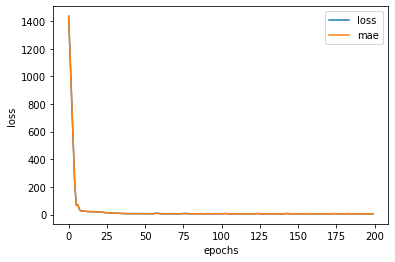

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(42)


model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])



model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])



history= model.fit(x_train, y_train, epochs= 300, verbose=0)

Text(0.5, 0, 'epochs')

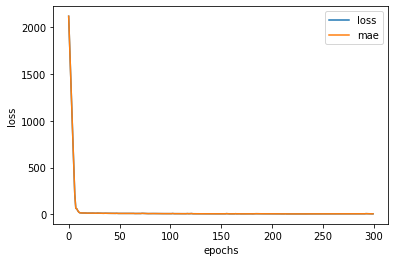

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 5.9000 - mae: 5.9000


[5.900007724761963, 5.900007724761963]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

198    33.0
396    28.0
33     19.0
208    13.0
93     14.0
       ... 
249    19.9
225    17.5
367    28.0
175    29.0
285    17.0
Name: mpg, Length: 80, dtype: float64

In [ ]:
tf.random.set_seed(42)


model= tf.keras.Sequential([
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])



model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])



history= model.fit(x_train, y_train, epochs= 300, verbose=0)

Text(0.5, 0, 'epochs')

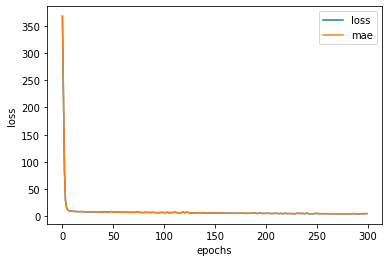

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 4ms/step - loss: 4.2666 - mae: 4.2666


[4.266592502593994, 4.266592502593994]

In [ ]:
tf.random.set_seed(42)


model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])



model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])



history= model.fit(x_train, y_train, epochs= 150, verbose=0)


Text(0.5, 0, 'epochs')

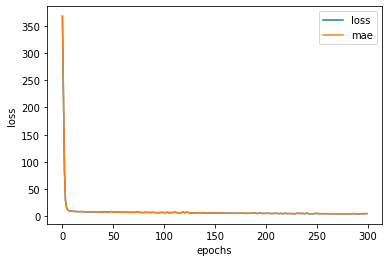

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 6ms/step - loss: 4.2666 - mae: 4.2666


[4.266592502593994, 4.266592502593994]

In [ ]:
tf.random.set_seed(42)


model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])



model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])



history= model.fit(x_train, y_train, epochs= 500, verbose=0)

Text(0.5, 0, 'epochs')

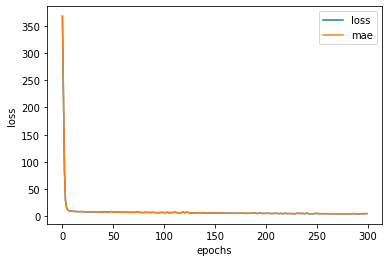

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 3.7972 - mae: 3.7972


[3.7971649169921875, 3.7971649169921875]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=42)
y_test

198    33.0
396    28.0
33     19.0
208    13.0
93     14.0
       ... 
331    33.8
103    11.0
81     28.0
227    19.0
239    30.0
Name: mpg, Length: 160, dtype: float64

In [ ]:
tf.random.set_seed(42)


model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(1)
])



model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])



history= model.fit(x_train, y_train, epochs= 400, verbose=0)

Text(0.5, 0, 'epochs')

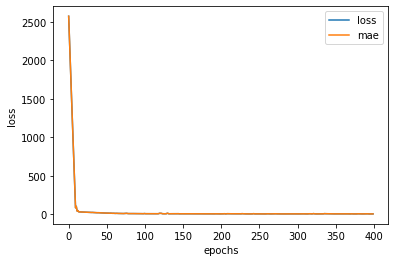

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 4.3061 - mae: 4.3061


[4.306126594543457, 4.306126594543457]

In [ ]:
tf.random.set_seed(42)


model= tf.keras.Sequential([
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])



model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])



history= model.fit(x_train, y_train, epochs=500, verbose=0)

Text(0.5, 0, 'epochs')

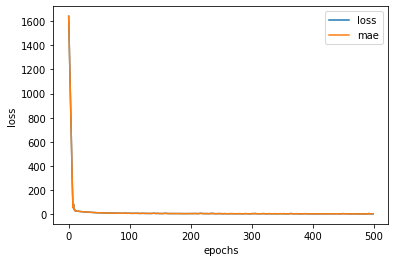

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 4.3540 - mae: 4.3540


[4.353999137878418, 4.353999137878418]